**Project 1**

Addressing Student Mental Health and Well-being

**Loading Dataset**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df = df = pd.read_csv('Student Mental health.csv')

df
# One of the feedback I got was to name the initial dataframe as "df" as that was what is commonly used.
# Renaming columns so it's easier to call them later on when coding.
df.rename(columns = {'Choose your gender':'Gender',
                     'What is your course?':'Course',
                     'Your current year of Study': 'Year',
                     'What is your CGPA?': 'CGPA',
                     'Marital status': 'Married',
                     'Do you have Depression?': 'Depression',
                     'Do you have Anxiety?': 'Anxiety',
                     'Do you have Panic attack?': 'Panic Attack',
                     'Did you seek any specialist for a treatment?': 'Seeking Treatment'},inplace = True)

# Dropping the timestamp table as I don't see it as important
df = df.drop(columns = "Timestamp")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             101 non-null    object 
 1   Age                100 non-null    float64
 2   Course             101 non-null    object 
 3   Year               101 non-null    object 
 4   CGPA               101 non-null    object 
 5   Married            101 non-null    object 
 6   Depression         101 non-null    object 
 7   Anxiety            101 non-null    object 
 8   Panic Attack       101 non-null    object 
 9   Seeking Treatment  101 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.0+ KB


**Data Preprocessing**

Cleaning up the null values

Since there was 1 entry that had a null vallue, I proceeded to check on that specific row. This one had their age missing. Since I had no way to validate what was the age of this student, I could either delete this data or keep it.

In [3]:
df[df.isnull().any(axis=1)]

,Gender,Age,Course,Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seeking Treatment
43,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [5]:
# Dropping the null values and double checking if there were still any null values
df = df.dropna()
df.isnull().sum()

Gender               0
Age                  0
Course               0
Year                 0
CGPA                 0
Married              0
Depression           0
Anxiety              0
Panic Attack         0
Seeking Treatment    0
dtype: int64

In [7]:
# Checking all courses that were submitted
df['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [9]:
# Changing all entries into a lower string
df['Course'] = df['Course'].str.lower()

# Removing unnecessary spaces from the Course and CGPA column
df['Course'] = df['Course'].str.strip()
df['CGPA'] = df['CGPA'].str.strip()

df['Course'].unique()

array(['engineering', 'islamic education', 'bit', 'laws', 'mathemathics',
       'pendidikan islam', 'bcs', 'human resources', 'irkhs',
       'psychology', 'kenms', 'accounting', 'enm', 'marine science',
       'koe', 'banking studies', 'business administration', 'law',
       'kirkhs', 'usuluddin', 'taasl', 'engine', 'ala',
       'biomedical science', 'benl', 'it', 'cts', 'engin', 'econs',
       'mhsc', 'malcom', 'kop', 'human sciences', 'biotechnology',
       'communication', 'diploma nursing', 'radiography', 'fiqh fatwa',
       'diploma tesl', 'fiqh', 'nursing'], dtype=object)

In [13]:
# I replaced each of the courses into similar courses/categories as well as cleaning up some of the spelling
# Replacing each course with similar courses/categories and cleaning up spelling
df['Course'] = df['Course'].replace({
    'pendidikan islam': 'education',
    'laws': 'law',
    'engine': 'engineering',
    'engin': 'engineering',
    'diploma nursing': 'nursing',
    'bit': 'it',
    'kirkhs': 'irkhs',
    'usuluddin': 'irkhs',
    'fiqh fatwa': 'irkhs',
    'fiqh': 'irkhs',
    'human resources': 'human sciences',
    'econs': 'economics',
    'kenms': 'economics',
    'enm': 'economics',
    'kop': 'pharmacy',
    'koe': 'education',
    'benl': 'education',
    'islamic education': 'education',
    'mathemathics': 'mathematics',
    'diploma tesl': 'education',
    'mhsc': 'human sciences',
    'taasl': 'education',
    'ala': 'human sciences',
    'bcs': 'computer science',
    'malcom': 'communication'
})

# To view the unique values in the 'Course' column
df['Course'].unique()


array(['engineering', 'education', 'it', 'law', 'mathematics',
       'computer science', 'human sciences', 'irkhs', 'psychology',
       'economics', 'accounting', 'marine science', 'banking studies',
       'business administration', 'biomedical science', 'cts',
       'communication', 'pharmacy', 'biotechnology', 'nursing',
       'radiography'], dtype=object)

In [15]:
# Capitalizing each word in their courses as well as replacing the courses with all uppercase.
# Most likely there is also a method to change the 3 specific courses into uppercase.
# Since there were a few, I decided to just replace them.

# Capitalizing each word in the 'Course' column and replacing specific courses with uppercase
df['Course'] = df['Course'].str.title().replace({
    'It': 'IT',
    'Irkhs': 'IRKHS',
    'Cts': 'CTS'
})

# To view the unique values in the 'Course' column
df['Course'].unique()


array(['Engineering', 'Education', 'IT', 'Law', 'Mathematics',
       'Computer Science', 'Human Sciences', 'IRKHS', 'Psychology',
       'Economics', 'Accounting', 'Marine Science', 'Banking Studies',
       'Business Administration', 'Biomedical Science', 'CTS',
       'Communication', 'Pharmacy', 'Biotechnology', 'Nursing',
       'Radiography'], dtype=object)

In [17]:
# Correcting CGPA replace without inplace
df['CGPA'] = df['CGPA'].replace({'0 - 1.99': 1,
                                 '2.00 - 2.49': 2,
                                 '2.50 - 2.99': 3,
                                 '3.00 - 3.49': 4,
                                 '3.50 - 4.00': 5})

# Explicitly handling possible downcasting changes
df['CGPA'] = df['CGPA'].astype(int)

# Correcting the Year capitalization without chained assignment warning
df['Year'] = df['Year'].str.title()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\2311595531.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CGPA'] = df['CGPA'].replace({'0 - 1.99': 1,


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             100 non-null    object 
 1   Age                100 non-null    float64
 2   Course             100 non-null    object 
 3   Year               100 non-null    object 
 4   CGPA               100 non-null    int32  
 5   Married            100 non-null    object 
 6   Depression         100 non-null    object 
 7   Anxiety            100 non-null    object 
 8   Panic Attack       100 non-null    object 
 9   Seeking Treatment  100 non-null    object 
dtypes: float64(1), int32(1), object(8)
memory usage: 8.2+ KB



**Data Analysis**

This is where the brunt of the work was done. There was a lot of Googling, researching and figuring out how codes worked.

**Number of Students experiencing Mental Health Issues**

The first and most basic type of analysis we can check for is how much are students experiencing mental health issues. I decided that if a student had either Depression, Anxiety or Panic Attacks, I would classify them as having Mental Health Issues.

Let's check for how many students are experiencing either Depression, Anxiety or Panic Attacks

In [21]:
# Created a new column title "Mental Health Issues" and marking a student with either Yes or No for MH Issues
df.loc[(df["Depression"]=="Yes") | (df["Anxiety"]=="Yes") | (df["Panic Attack"]=="Yes"),'Mental Health Issues']= 'Yes'
df.loc[(df["Depression"]=="No") & (df["Anxiety"]=="No") & (df["Panic Attack"]=="No"),'Mental Health Issues']= 'No'


# Creating a dataframe with students who have mental health issues or not
mental_health_yes = df[df["Mental Health Issues"] == 'Yes']
mental_health_no = df[df["Mental Health Issues"] == 'No']

# Showing the count of Students grouped via Mental Health Issues
df.groupby(['Mental Health Issues']).count()

,Gender,Age,Course,Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seeking Treatment
Mental Health Issues,,,,,,,,,,
No,36,36,36,36,36,36,36,36,36,36
Yes,64,64,64,64,64,64,64,64,64,64


**Data Visualization**


**1. Plotting the Pie Chart**

This is just a simple Pie Chart to see the of students who are experiencing Mental Health Issues. As we can see there are more students experiencing Mental Health Issues than those that do not.


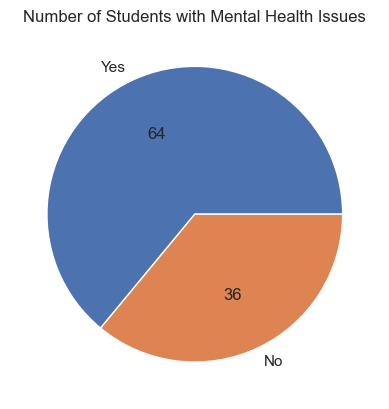

In [23]:
# Setting default seaborn theme
sns.set()

# Plotting the number of students who have MH Issues vs students with no MH Issues
plt.pie(df['Mental Health Issues'].value_counts(), labels = ['Yes', 'No'], autopct = '%.f')

plt.title('Number of Students with Mental Health Issues')

plt.show()


**2. Comparing students the CGPA of students who have MH Issues vs students with No MH Issues**

Text(0.5, 1.0, 'CGPA of Students with Mental Health Issues vs No Mental Health Issues')

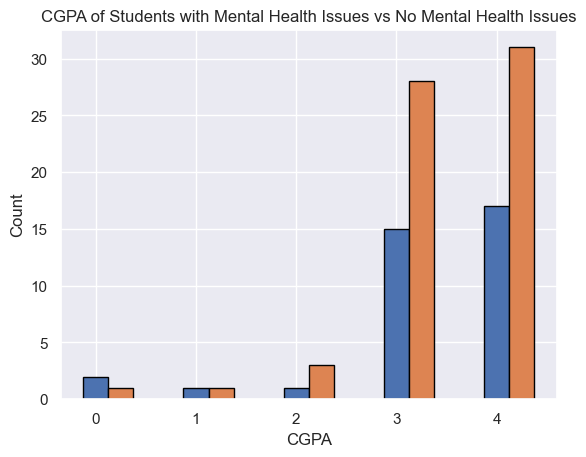

In [25]:
import numpy as np # linear algebra
# Creating a series of the students CGPA for both dataframes of students with MH Issues and no MH Issues
mental_health_no_cgpa = mental_health_no.groupby("CGPA")["Mental Health Issues"].count()
mental_health_yes_cgpa = mental_health_yes.groupby("CGPA")["Mental Health Issues"].count()

#Plotting a comparison bar chart
n=5
r = np.arange(n)
width = 0.25


plt.bar(r, mental_health_no_cgpa,
        width = width, edgecolor = 'black',
        label='No')
plt.bar(r + width, mental_health_yes_cgpa,
        width = width, edgecolor = 'black',
        label='Yes')

plt.xlabel("CGPA")
plt.ylabel('Count')
plt.title("CGPA of Students with Mental Health Issues vs No Mental Health Issues")


As we can see above, most of the students were actually doing well in their studies as the majority had reported a CGPA of 3.0 and above. What's interesting is that students who have reported having MH issues also are performing proportionately the same as with their peers who do not have MH Issues.




**Average Performance of Students**

To further check if students with MH Issues are doing the same as with their peers, I looked into getting the average of the total students, students who reported having MH Issues and as well as students who are seeking treatment. This is also where changing the CGPA scores into numbers with 1 at the lowest and 5 as the highest is used.


In [27]:
# Creating a dataframe for students who are Seeking Treatment
student_st = df[df["Seeking Treatment"] == 'Yes']

# Getting the avrage of each group.
total_ave = df["CGPA"].mean()
student_mh_ave = mental_health_yes['CGPA'].mean()
student_st_ave = student_st['CGPA'].mean()

print(f'''The average of each total group is:
            Total Students: {total_ave}
            Students with MH Issues: {student_mh_ave}
            Students Seeking Treatment: {student_st_ave}''')

The average of each total group is:
            Total Students: 4.31
            Students with MH Issues: 4.359375
            Students Seeking Treatment: 4.333333333333333



**3. Plotting the bar chart**

As we can see the average is of all three groups are very similar at 4.3 across the board and to further visualize this, we will do a bar chart. This further reinforces that students with MH Issues are doing just as well as their peers.


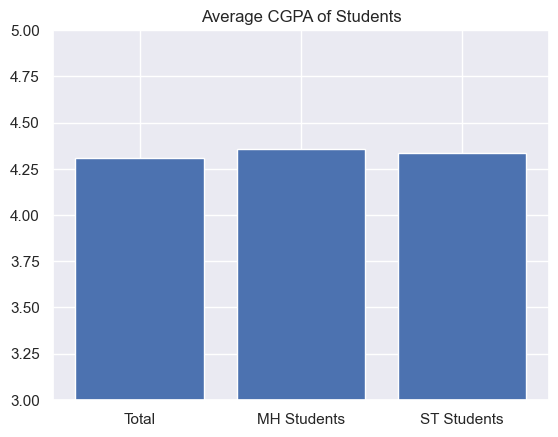

In [29]:
# Simple bar chart of the averages
x_axis = ['Total', 'MH Students', 'ST Students']
y_axis = [total_ave, student_mh_ave, student_st_ave]
plt.bar(x_axis, y_axis)
plt.ylim([3, 5])

plt.title('Average CGPA of Students')

plt.show()


**Relation of Courses and Mental Health Issues**

What I tried to find out next was which courses were more likely to have students with MH Issues or not.

In [31]:
# Creating a series where the count of student's MH Issues is grouped by course
mental_health_no_course = mental_health_no.groupby("Course")["Mental Health Issues"].count()
mental_health_yes_course = mental_health_yes.groupby("Course")["Mental Health Issues"].count()

# Sorting from highest to lowest
mental_health_no_course = mental_health_no_course.sort_values(ascending = False)
mental_health_yes_course = mental_health_yes_course.sort_values(ascending = False)

# Creating a new dataframe for this plot
new_df = pd.concat([mental_health_yes_course, mental_health_no_course], axis=1)

# Renaming the column names
new_df.columns.values[0] = "Has Mental Health Issues"
new_df.columns.values[1] = "No Mental Health Issues"

# Changing the NULL values into 0 and then creating a new column named Total.
new_df.fillna(0, inplace = True)
new_df['Total'] = new_df['Has Mental Health Issues'] + new_df['No Mental Health Issues']

# Sorting
new_df = new_df.sort_values(by=['Total','Has Mental Health Issues', 'No Mental Health Issues'], ascending=False)

new_df = new_df.reset_index(level=0)

new_df.head()

,Course,Has Mental Health Issues,No Mental Health Issues,Total
0,Engineering,12.0,8.0,20.0
1,Computer Science,11.0,7.0,18.0
2,Education,11.0,5.0,16.0
3,IT,10.0,0.0,10.0
4,IRKHS,3.0,3.0,6.0


 We can see, the top 5 courses with students reporting having Mental Health Issues is Engineering, Computer Science, Education, IT and IRKHS. It's not surprising that Engineering, Computer Science and IT would have students reporting experiencing MH issues as these courses can be very demanding. What's surprising is Education having a high report of MH Issues.

Another interesting thing to take note of is that all IT students have reported to have at least 1 Mental Health Issue.

To further illustrate the distribution of courses and MH Issues, we're going to plot a bar chart which you can see below

**3. Bar Chart**

Coursewise Count of Students with MH Issues

Text(0.5, 1.0, 'Count of Students with MH Issues')

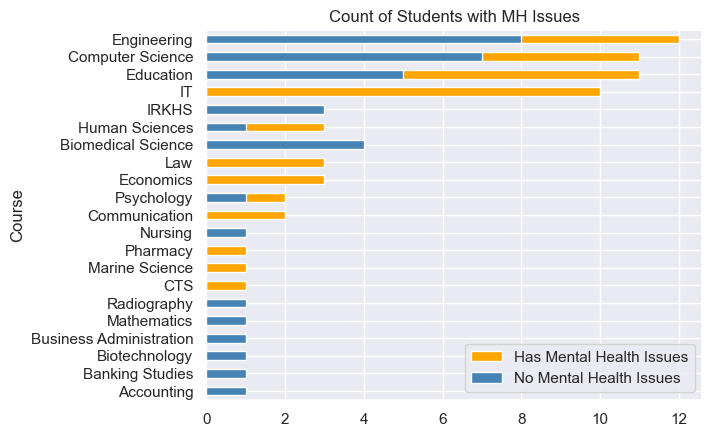

In [33]:


# Sorting Data for this plot
new_df = new_df.sort_values(by=['Total','Has Mental Health Issues', 'No Mental Health Issues'], ascending=True)

# Plotting via stacked horizontal bars
ax = new_df.plot(x="Course", y="Has Mental Health Issues", kind="barh", color = 'orange')

new_df.plot(x="Course", y="No Mental Health Issues", kind="barh", ax=ax, color = 'steelblue')
plt.title('Count of Students with MH Issues')



**Closing Notes**

This was my first project that I worked on and it's been very insightful for me to get to know on how to work with data. The data itself was very basic but I will take everything I've learned to heart. I'll try to optimize some of these code in near future. I'm proud to have created this even though some of the code I've taken help from StackOverFlow and articles online.